In [29]:
from sklearn import tree
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from evaluacion_funciones import *

from termcolor import colored

In [2]:
seed=42

In [3]:
# Cargamos el conjunto de datos
datos_iris = datasets.load_iris()
datos_wine = datasets.load_wine()
datos_breast = datasets.load_breast_cancer()

X = {
    'IRIS': datos_iris.data,
    'WINE': datos_wine.data,
    'BREAST': datos_breast.data
}

y = {
    'IRIS': datos_iris.target,
    'WINE': datos_wine.target,
    'BREAST': datos_breast.target
}

In [4]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')
}

In [5]:
# 1) Partición externa
# 2) Extracción de características (en caso de trabajar con imágenes)

# 3) Estandarizacion de los datos
standardizer = preprocessing.StandardScaler()
for nombre, exp in X.items():
    X[nombre] = standardizer.fit_transform(X[nombre])

# 4) Selección de atributos

In [6]:
# 5) Construcción del algoritmo de aprendizaje.
algoritmos = {'DT': tree.DecisionTreeClassifier(criterion='gini', random_state=seed)}

In [16]:
# 5.1) Validación cruzada interna y Optimización de los hiperparámetros
y_pred = {}
for nombre, exp in X.items():
    y_pred[nombre] = cross_val_predict(algoritmos['DT'], X[nombre], y[nombre], 
                                       cv=KFold(n_splits=5, shuffle=True, random_state=seed))
    
#print(y_pred)

In [17]:
# Mostramos el resultado de varias métricas
results={}
for nombre, exp in X.items():
    results[nombre] = evaluacion(y[nombre], y_pred[nombre], metricas)
    print("Matriz de confusión (%s):\n%s" % (nombre, metrics.confusion_matrix(y[nombre], y_pred[nombre])))
    print("Tabla de métricas (%s):\n%s" % (nombre, metrics.classification_report(y[nombre], y_pred[nombre], digits=3)))

Matriz de confusión (IRIS):
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
Tabla de métricas (IRIS):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.922     0.940     0.931        50
           2      0.939     0.920     0.929        50

    accuracy                          0.953       150
   macro avg      0.953     0.953     0.953       150
weighted avg      0.953     0.953     0.953       150

Matriz de confusión (WINE):
[[53  6  0]
 [ 5 61  5]
 [ 1  5 42]]
Tabla de métricas (WINE):
              precision    recall  f1-score   support

           0      0.898     0.898     0.898        59
           1      0.847     0.859     0.853        71
           2      0.894     0.875     0.884        48

    accuracy                          0.876       178
   macro avg      0.880     0.877     0.879       178
weighted avg      0.877     0.876     0.876       178

Matriz de confusión (BREAST):
[[194  18]
 [ 20 337]]
Tab

C:\Users\msi15\Documents\GitHub\Artificial-Intelligence-Dan\5 Aprendizaje Supervisado\Scripts\Raw\5_Classification\evaluacion_funciones.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,


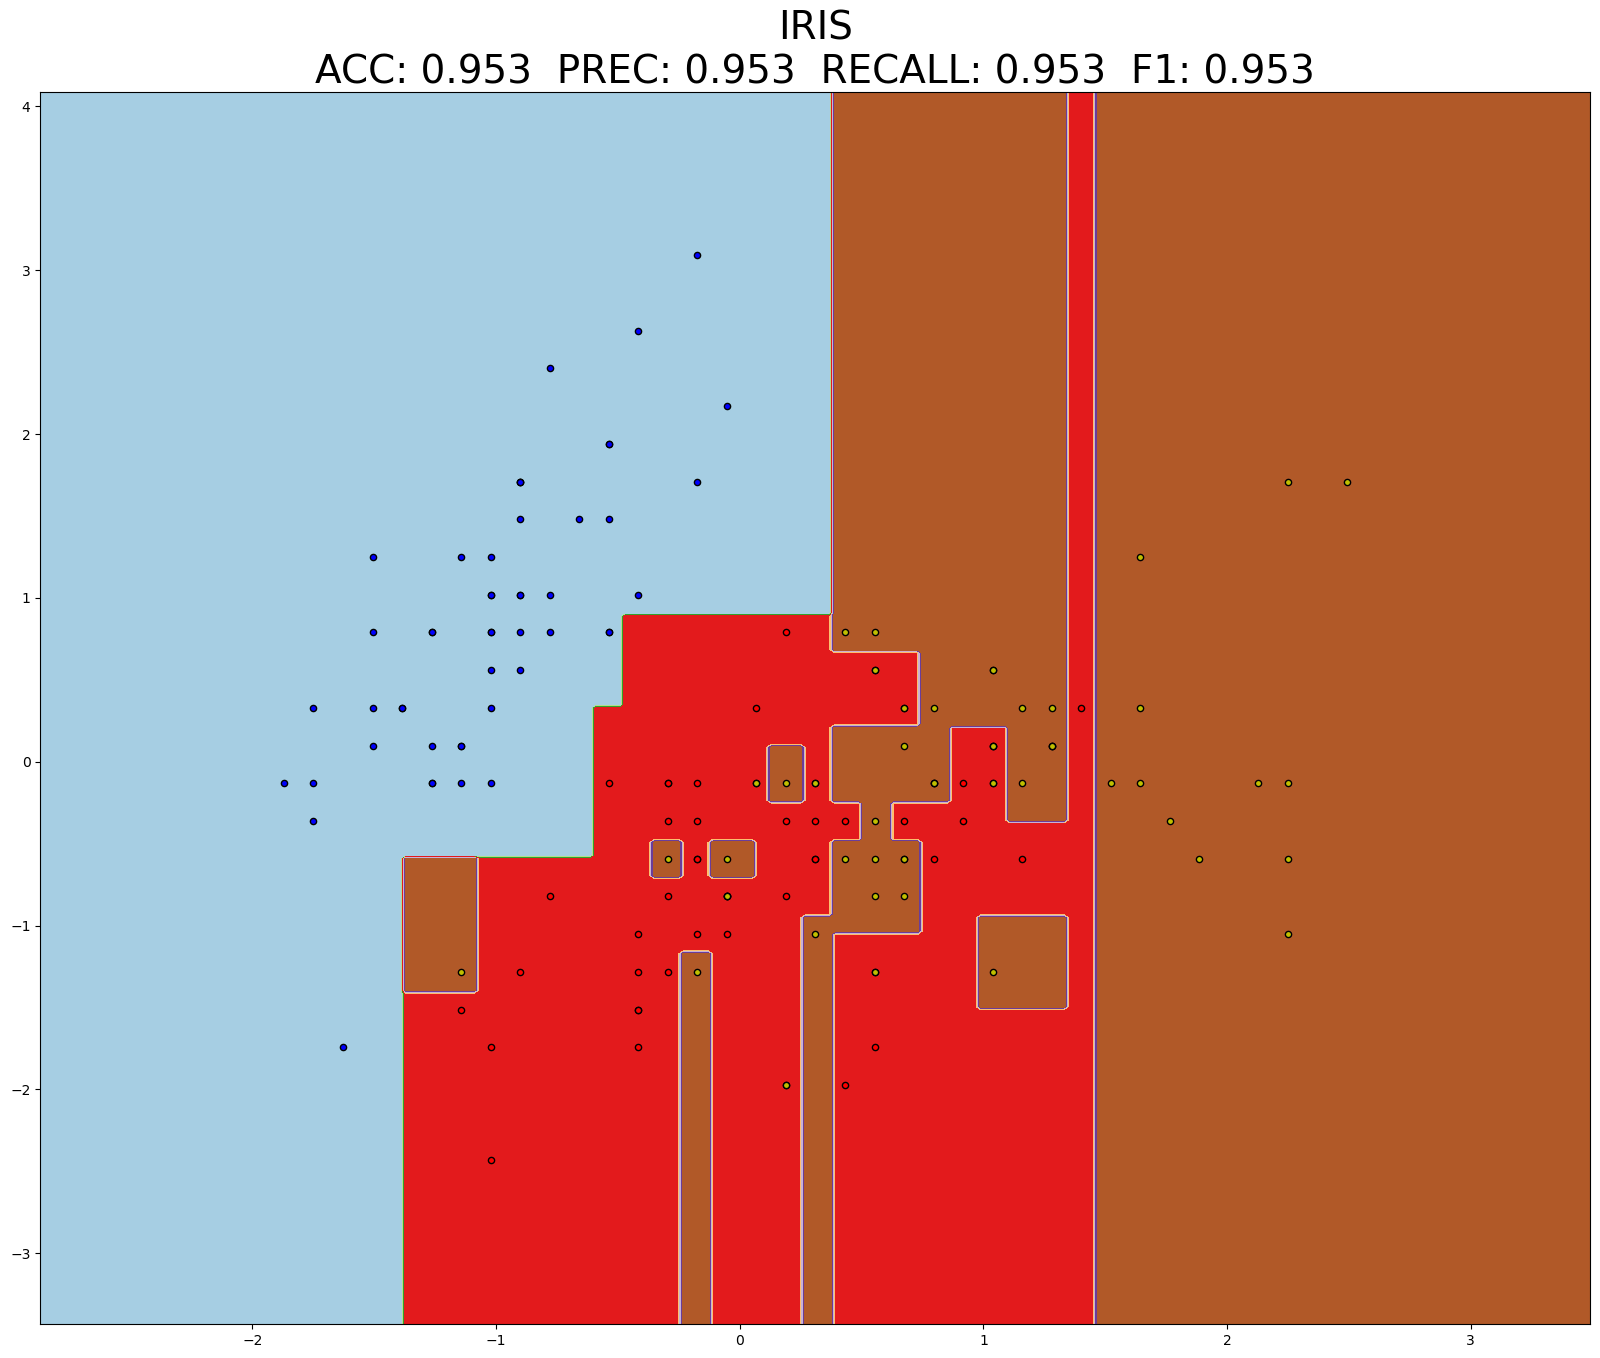

C:\Users\msi15\Documents\GitHub\Artificial-Intelligence-Dan\5 Aprendizaje Supervisado\Scripts\Raw\5_Classification\evaluacion_funciones.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,


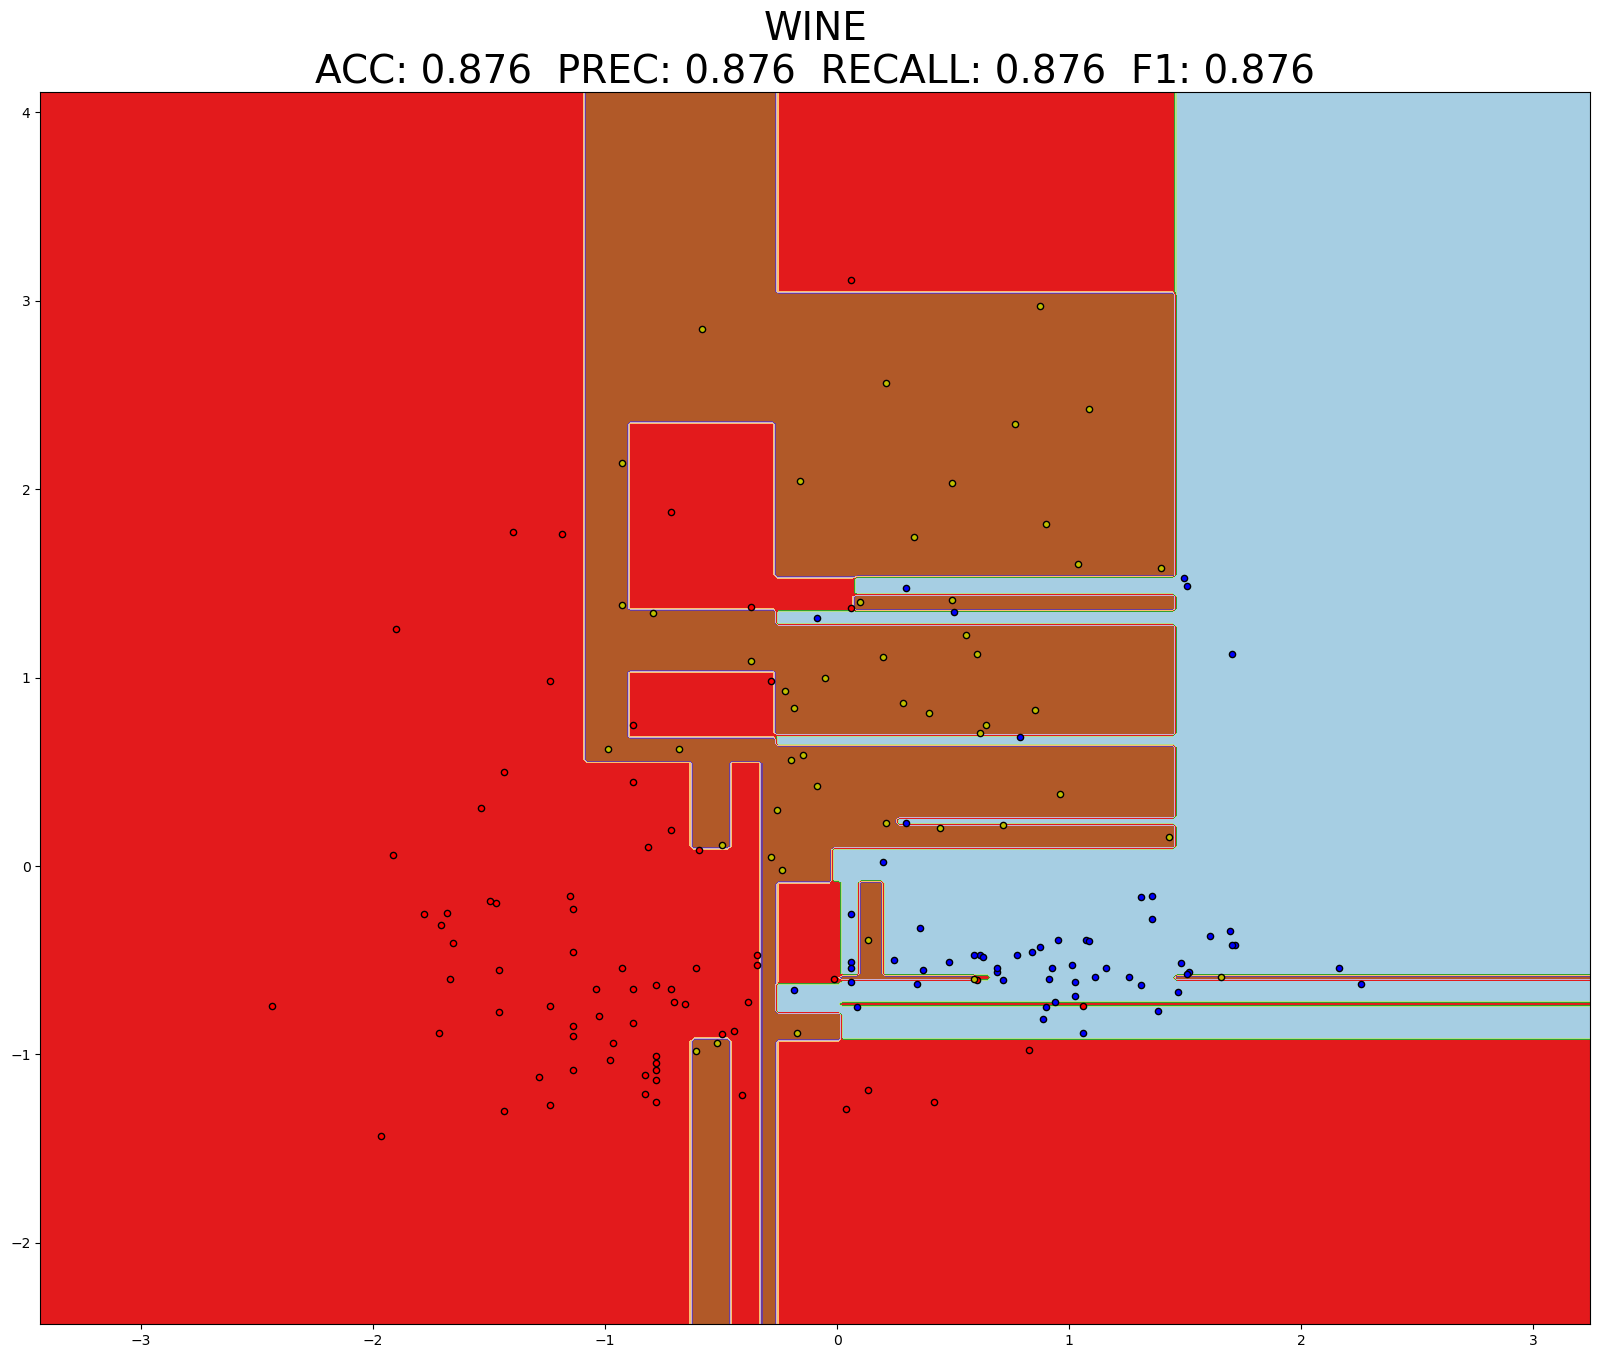

C:\Users\msi15\Documents\GitHub\Artificial-Intelligence-Dan\5 Aprendizaje Supervisado\Scripts\Raw\5_Classification\evaluacion_funciones.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,


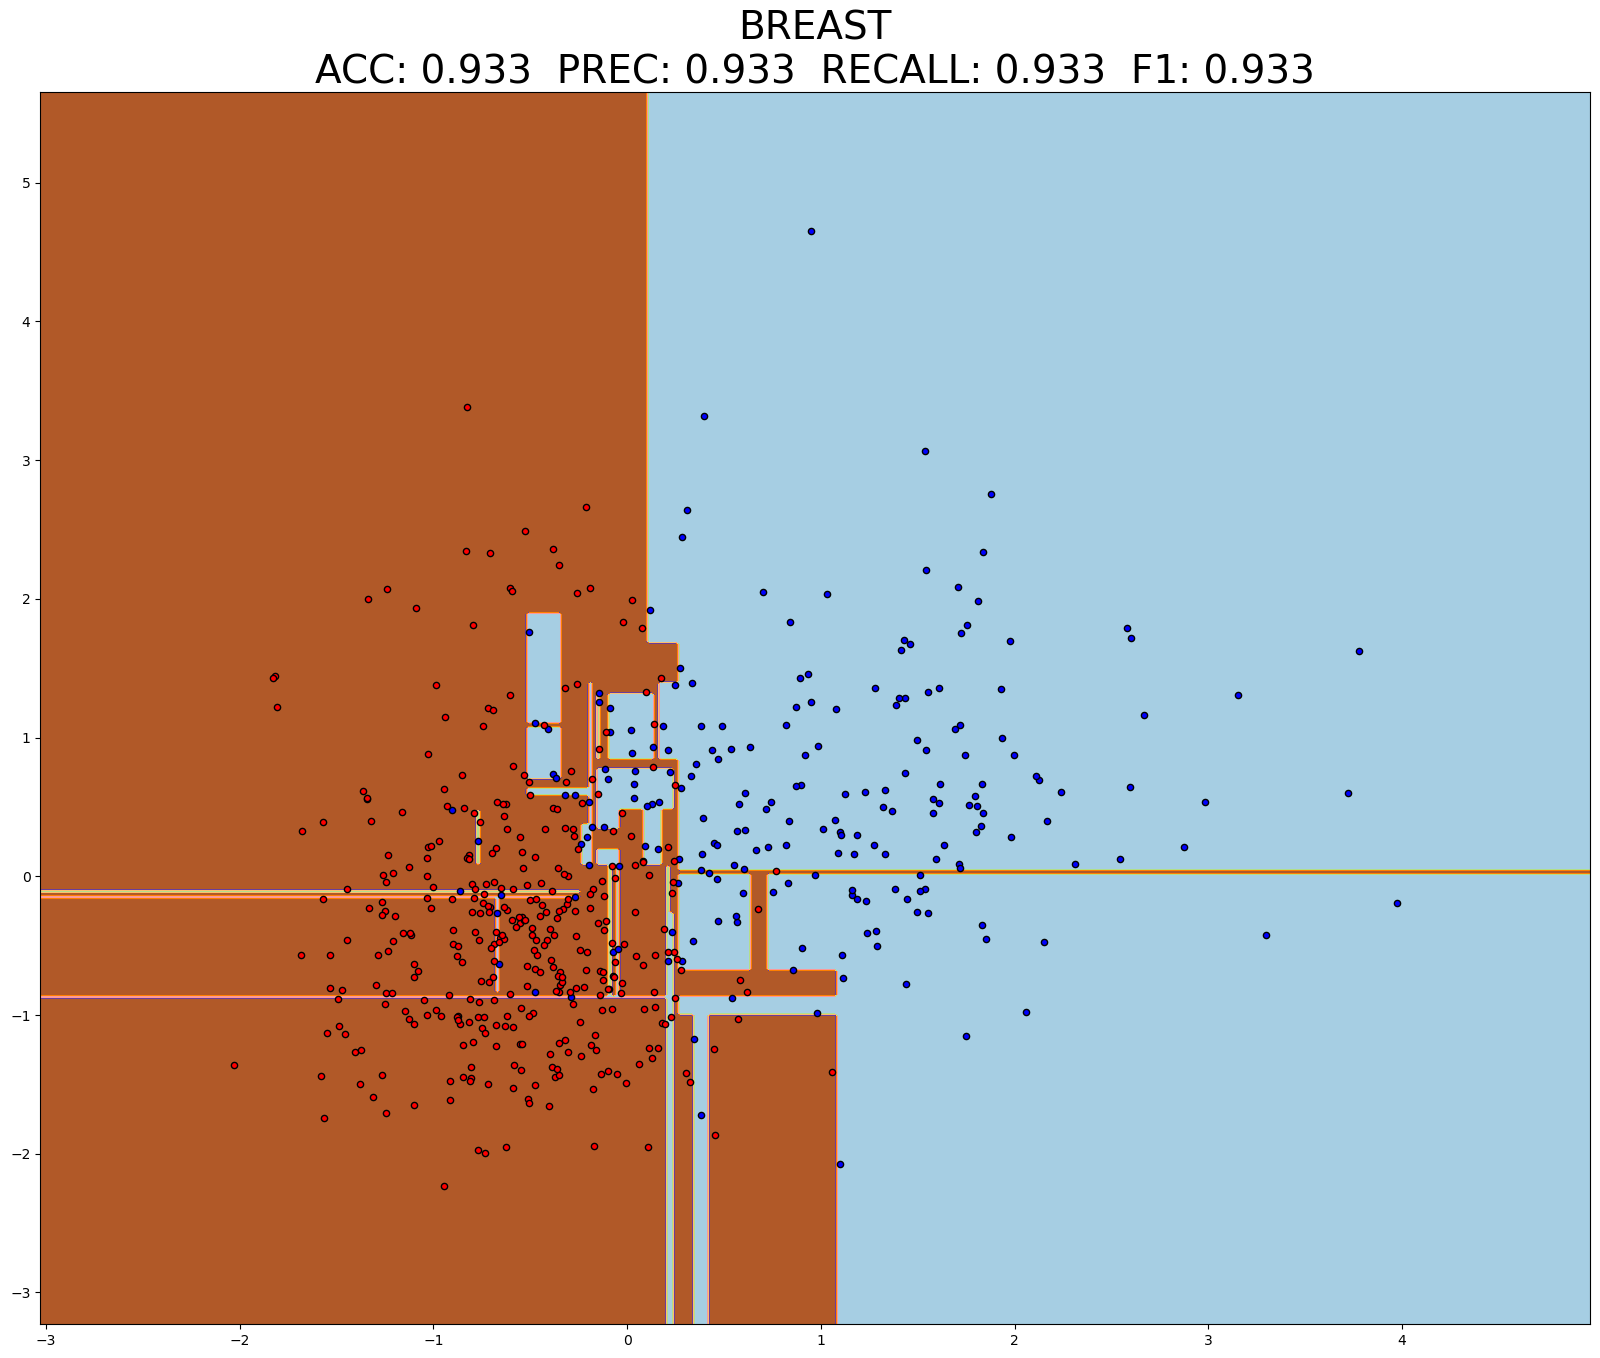

In [15]:
# 5.2) Entrenamiento del modelo definitivo (usamos 2 atributos para poder obtener gráficos en 2D)
for nombre, exp in X.items():
    modelo_definitivo = algoritmos['DT'].fit(X[nombre][:,:2], y[nombre])
    mapa_modelo_clasif_2d(X[nombre][:,:2], y[nombre], modelo_definitivo, results[nombre], nombre)

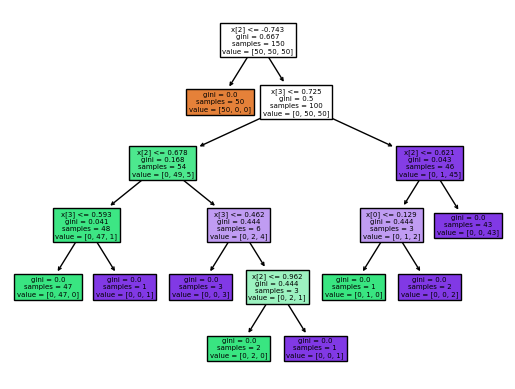

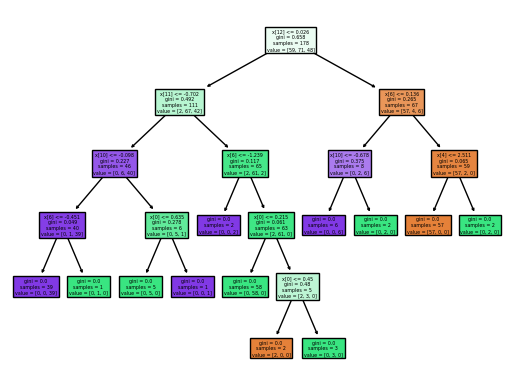

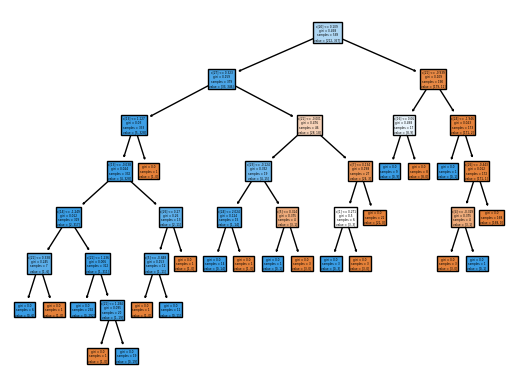

In [12]:
# 5.3) Ploteamos el árbol con todos los datos para visualización árbol.
for nombre, exp in X.items():
    modelo_completo = algoritmos['DT'].fit(X[nombre], y[nombre])
    plt.figure()
    tree.plot_tree(modelo_completo,filled=True)  
    plt.savefig('tree_' + nombre + '.pdf',format='pdf',bbox_inches = "tight")

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble , linear_model
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [46]:
parameters = {'DT': {'criterion': (['gini']),
                      'max_depth': ([6,7])},
              
              'ADA_BOOST': {'n_estimators': (50, 60,),
                            'learning_rate':(0.1, 1 , 5 , 10)},
              
              'RF_Bagging': {'n_estimators': (80,90,100),
                             'criterion':(['gini'])},
              
              'LOGR': {'solver':(['saga']),
                       'penalty':([None, 'l1', 'l2']),
                        'max_iter':(1000,2000),
                        'multi_class':(['ovr'])}
             }
              
                      
algs = {'DT': tree.DecisionTreeClassifier(random_state=42),
        'ADA_BOOST':ensemble.AdaBoostClassifier(random_state=42),
        'RF_Bagging': ensemble.RandomForestClassifier(random_state=42),
        'LOGR': linear_model.LogisticRegression(random_state=42),
        }                      

In [61]:
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')
}

In [64]:
model = {}
for name, _ in algs.items():
    
    print(colored('Algorithm: ' + name, 'red'))
    
    score = metrics.make_scorer(metrics.accuracy_score)
    
    model_cv = GridSearchCV(algs[name], parameters[name], scoring=score, cv=5,return_train_score=True)  # Hace validacion cruzada aqui? que metricas saca?
    model[name] = model_cv.fit(X['IRIS'], y['IRIS'])    # esto seria hacerlo con todo test?
    cv_res = model[name].cv_results_
    
    print('Best parameters: ', model[name].best_params_) # Qué esta cogiendo?
    best_iter = model[name].best_index_
    print('Accuracy: %0.4f +/- %0.4f' % (cv_res['mean_test_score'][best_iter], cv_res['std_test_score'][best_iter]))
    
    print('------------')

Algorithm: DT
Best parameters:  {'criterion': 'gini', 'max_depth': 6}
Accuracy: 0.9533 +/- 0.0340
------------
Algorithm: ADA_BOOST
Best parameters:  {'learning_rate': 1, 'n_estimators': 50}
Accuracy: 0.9467 +/- 0.0340
------------
Algorithm: RF_Bagging
Best parameters:  {'criterion': 'gini', 'n_estimators': 80}
Accuracy: 0.9667 +/- 0.0211
------------
Algorithm: LOGR
Best parameters:  {'max_iter': 1000, 'multi_class': 'ovr', 'penalty': None, 'solver': 'saga'}
Accuracy: 0.9600 +/- 0.0249
------------
